In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 20, 8
import warnings
warnings.filterwarnings('ignore')
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import sklearn

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_excel('data.xlsx')
print(df.columns)

Index(['Borrower ID', 'Loan ID', 'Credit score', 'Loan amount', 'Disbursal date', 'Interest rate', 'Loan term', 'Borrower type', 'Loan type', 'Repayment date', 'Expected repayment date', 'Loan status', 'Days late', 'default', 'Purpose', 'Monthly payment', 'Outstanding principal', 'Repaid principal', 'Outstanding interest', 'Repaid interest', 'Delay interest', 'Arrears', 'Birth year', 'Gender', 'City', 'Marital status', 'Children', 'Residential status', 'Education', 'Occupation', 'Months at current employer', 'Years working total', 'Employment status', 'DTI', 'Family liabilities', 'Family income', 'Borrower income', 'Borrower liabilities', 'Spouse income', 'Spouse liabilities', 'Last debt payment date'], dtype='object')


In [4]:
df.head()

,Borrower ID,Loan ID,Credit score,Loan amount,Disbursal date,Interest rate,Loan term,Borrower type,Loan type,Repayment date,Expected repayment date,Loan status,Days late,default,Purpose,Monthly payment,Outstanding principal,Repaid principal,Outstanding interest,Repaid interest,Delay interest,Arrears,Birth year,Gender,City,Marital status,Children,Residential status,Education,Occupation,Months at current employer,Years working total,Employment status,DTI,Family liabilities,Family income,Borrower income,Borrower liabilities,Spouse income,Spouse liabilities,Last debt payment date
0,U-00000382,L-00000001,A,3000,2015-08-17,20.96,12,fizinis asmuo,kasmėnesinės įmokos,2016-02-04,2016-01-31,grąžinta,0,0,namų remontui,271.39,0.0,3000.0,0.0,256.62,NaN,NaN,1991,moteris,Vilnius,nevedęs/netekėjusi,0,nuosavas,pagrindinis,Eksporto vadybininkė / Export manager,18,NaN,"dirba, pilnu etatu",34,0.0,800.0,NaN,NaN,NaN,NaN,NaT
1,U-00000405,L-00000002,C,2700,2015-08-28,25.82,54,fizinis asmuo,kasmėnesinės įmokos,2020-02-27,2020-02-27,grąžinta,0,0,paskolų refinansavimui,85.03,0.0,2700.0,0.0,1891.64,NaN,NaN,1985,moteris,Vilnius,nevedęs/netekėjusi,0,nuomojamas,magistras,Specialistė / Specialist,60,NaN,"dirba, pilnu etatu",13,0.0,590.0,NaN,NaN,NaN,NaN,NaT
2,U-00000408,L-00000003,D,1300,2015-08-20,25.25,24,fizinis asmuo,kasmėnesinės įmokos,2016-10-31,2016-10-31,grąžinta,0,0,kita,66.46,0.0,1300.0,0.0,294.96,NaN,NaN,1989,vyras,Kaunas,nevedęs/netekėjusi,0,nuomojamas,magistras,Inžinierius-projektuotojas,9,NaN,"dirba, pilnu etatu",16,14.0,510.0,NaN,NaN,NaN,NaN,NaT
3,U-00000528,L-00000028,C,2000,2015-08-21,25.83,27,fizinis asmuo,kasmėnesinės įmokos,2016-09-30,2016-09-30,grąžinta,0,0,paskolų refinansavimui,91.07,0.0,2000.0,0.0,458.90,NaN,NaN,1983,moteris,Šilutė,nevedęs/netekėjusi,0,gyvena su tėvais,magistras,Valstybės tarnautoja/Public servant,48,NaN,"dirba, pilnu etatu",25,127.0,900.0,NaN,NaN,NaN,NaN,NaT
4,U-00000545,L-00000038,D,2250,2015-08-25,31.56,18,fizinis asmuo,kasmėnesinės įmokos,2017-03-13,2017-02-25,grąžinta,0,0,paskolų refinansavimui,158.52,0.0,2250.0,0.0,603.37,7.92,NaN,1979,moteris,"Trakų rajonas, Bražuolės kaimas",susituokęs(-usi),2,gyvena su tėvais,pagrindinis,Barmenė,72,NaN,"dirba, pilnu etatu",36,0.0,420.0,NaN,NaN,NaN,NaN,NaT


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17881 entries, 0 to 17880
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Borrower ID                 17881 non-null  object        
 1   Loan ID                     17881 non-null  object        
 2   Credit score                17881 non-null  object        
 3   Loan amount                 17881 non-null  int64         
 4   Disbursal date              17881 non-null  datetime64[ns]
 5   Interest rate               17881 non-null  float64       
 6   Loan term                   17881 non-null  int64         
 7   Borrower type               17881 non-null  object        
 8   Loan type                   17881 non-null  object        
 9   Repayment date              11654 non-null  datetime64[ns]
 10  Expected repayment date     17881 non-null  datetime64[ns]
 11  Loan status                 17881 non-null  object    

In [6]:
#Triname nelogiškus/neteisingus duomenis
df['Months at current employer'].sort_values(ascending=True).head(100)
df = df[df['Months at current employer'] >= 4]  
#Pašaliname labai mažą kiekį labai gerai įvertintų klientų
df['Credit score'].value_counts()
df = df[df['Credit score'] != 'A+']
#Nutriname tris paskolas su neaiškiu tikslu.
df = df[df.Purpose != 'loan_purpose.27']
#Pašaliname kelis klientus su pažymėtais dideliais kiekiais vaikų
df['Children'].value_counts()
df = df[df.Children != 5]
df = df[df.Children != 6]
df = df[df.Children != 7]
df = df[df.Children != 8]
#Pašaliname išskirtis darbo staže
df['Years working total'].value_counts()
df = df[df['Years working total'] != 55]
df = df[df['Years working total'] != 50]
df = df[df['Years working total'] != 48]
df = df[df['Years working total'] != 46]
df = df[df['Years working total'] != 44]

In [7]:
#Lyčių beveik po lygiai
df['Gender'].value_counts()

moteris    8088
vyras      7488
Name: Gender, dtype: int64

In [8]:
#Vedybinis statusas pasiskirstęs pakankamai gerai
df['Marital status'].value_counts()

susituokęs(-usi)      5615
nevedęs/netekėjusi    5023
išsiskyręs(-usi)      2692
kita                  2249
Name: Marital status, dtype: int64

In [9]:
#Išskirčių prie išsilavinimo nėra
df['Education'].value_counts()

aukštasis      5969
profesinis     5524
pagrindinis    3049
magistras      1037
Name: Education, dtype: int64

In [10]:
#Pašaliname išskirtis iš gimimo metų.
df = df[df['Birth year'] != 1948]
df = df[df['Birth year'] != 1949]
df = df[df['Birth year'] != 1950]

In [11]:
#Patikriname kaip pasiskirsčiusios pajamos
df['Family income'].value_counts(bins=10)

(-9.468, 946.703]       10897
(946.703, 1893.406]      3859
(1893.406, 2840.109]      610
(2840.109, 3786.812]      132
(3786.812, 4733.515]       41
(5680.218, 6626.921]       11
(6626.921, 7573.624]       10
(4733.515, 5680.218]        8
(7573.624, 8520.327]        3
(8520.327, 9467.03]         2
Name: Family income, dtype: int64

In [12]:
#Pašaliname išskirtis atlyginimuose
df = df[df['Borrower income'].notnull()]
df = df[df['Borrower income'] != 12.1689]
df = df[df['Borrower income'] <= 2500]  
df = df[df['Family income'] > 0]  
df['Family income'].sort_values(ascending = False)

14118    5843.7300
14312    5587.2300
17580    4624.9700
10606    4267.1000
12410    4147.7600
           ...    
15537     181.6000
6230      171.6601
11703     171.0000
11268     127.0000
8724      112.8513
Name: Family income, Length: 7956, dtype: float64

In [13]:
#Pašaliname išskirtis iš DTI kriterijaus
df['DTI'].sort_values(ascending = False)
df = df[df['DTI'] != 109]
df = df[df['DTI'] != 62]

In [14]:
#Pašaliname išskirtis iš darbo statuso
df['Employment status'].value_counts()
df = df[df['Employment status'] != 'bedarbis']
df = df[df['Employment status'] != 'pensininkas']
df = df[df['Employment status'] != 'studentas']
df['Employment status'].value_counts()

dirba, pilnu etatu      7775
dirba, nepilnu etatu      88
individuali veikla        85
Name: Employment status, dtype: int64

In [15]:
#Pašaliname miestus kurių tik po vieną.
value_counts = df['City'].value_counts()
to_remove = value_counts[value_counts <= 1].index
df = df[~df['City'].isin(to_remove)]

In [16]:
#Sutvarkome įsipareigojimų duomenis
df['Borrower liabilities'].sort_values(ascending = False)
df['Borrower liabilities'] = df['Borrower liabilities'].fillna(0)

In [17]:
dataa = df[["Borrower ID", "Credit score", "Loan amount", "Interest rate", "Loan term", "default", "Purpose", "Monthly payment", "Birth year", "Gender", "City", "Marital status", "Children", "Residential status", "Education", "Months at current employer", "DTI", "Family income", "Family liabilities", "Borrower income", "Borrower liabilities"]]

In [18]:
dataa

,Borrower ID,Credit score,Loan amount,Interest rate,Loan term,default,Purpose,Monthly payment,Birth year,Gender,City,Marital status,Children,Residential status,Education,Months at current employer,DTI,Family income,Family liabilities,Borrower income,Borrower liabilities
153,U-00002597,B,1640,23.49,33,0,kita,70.96,1991,vyras,NaN,nevedęs/netekėjusi,0,nuosavas,aukštasis,62,35,1610.5197,0.00,1610.5197,0.00
227,U-00003079,A,6000,22.53,66,0,namų remontui,161.36,1981,moteris,Vilnius,išsiskyręs(-usi),2,nuosavas,pagrindinis,4,18,1261.5074,0.00,1261.5074,0.00
1030,U-00007926,B,3080,21.05,48,1,paskolų refinansavimui,105.26,1964,moteris,Panevėžys,susituokęs(-usi),0,nuosavas,profesinis,71,21,915.7617,0.00,915.7617,0.00
1062,U-00008093,D,2100,24.95,45,1,namų remontui,77.24,1964,moteris,Druskininkai,susituokęs(-usi),0,nuosavas,profesinis,24,30,711.6840,0.00,711.6840,0.00
1107,U-00008375,B,4200,22.84,48,1,paskolų refinansavimui,147.82,1957,moteris,Kuršėnai,susituokęs(-usi),0,nuosavas,profesinis,204,31,1166.9114,0.00,1166.9114,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17873,U-29572286,B,4350,14.00,24,0,kita,221.24,1972,vyras,Kaunas,susituokęs(-usi),0,nuosavas,aukštasis,186,36,1231.2600,220.59,833.2600,87.00
17874,U-39398471,B,2175,15.00,24,0,automobiliui,110.96,1970,moteris,Pakruojo r.,išsiskyręs(-usi),0,nuosavas,profesinis,15,26,431.4300,0.00,431.4300,0.00
17877,U-15352595,D,4200,25.00,60,0,paskolų refinansavimui,125.24,1981,moteris,Švenčionėliai,nevedęs/netekėjusi,3,nuomojamas,profesinis,20,22,580.7200,0.00,580.7200,0.00
17878,U-99566421,D,3745,23.00,54,0,paskolų refinansavimui,117.55,1998,vyras,Joniškio r.,kita,0,gyvena su tėvais,profesinis,7,31,1148.8800,241.95,1148.8800,241.95


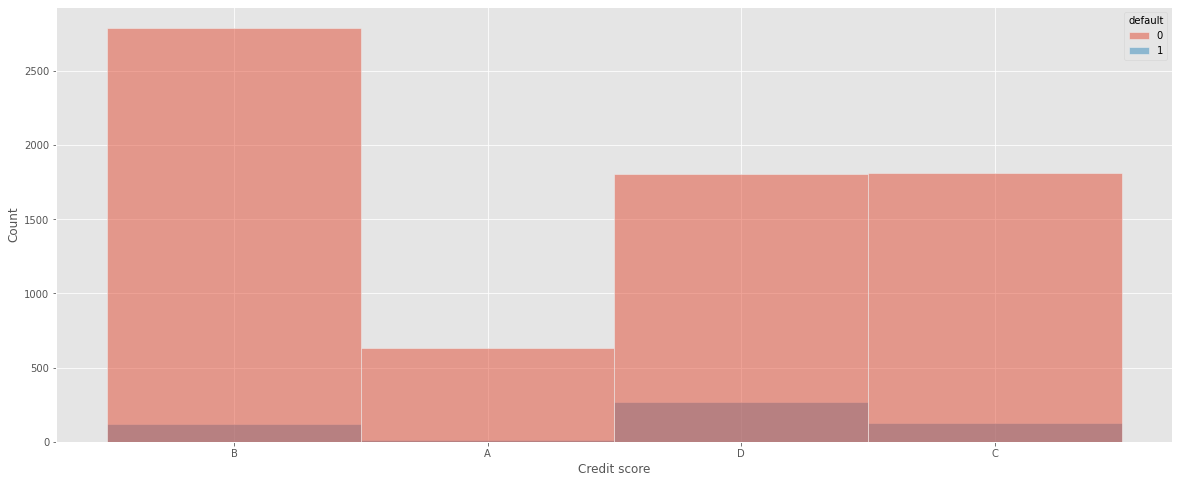

In [19]:
sns.histplot(x='Credit score', data=dataa, hue="default");

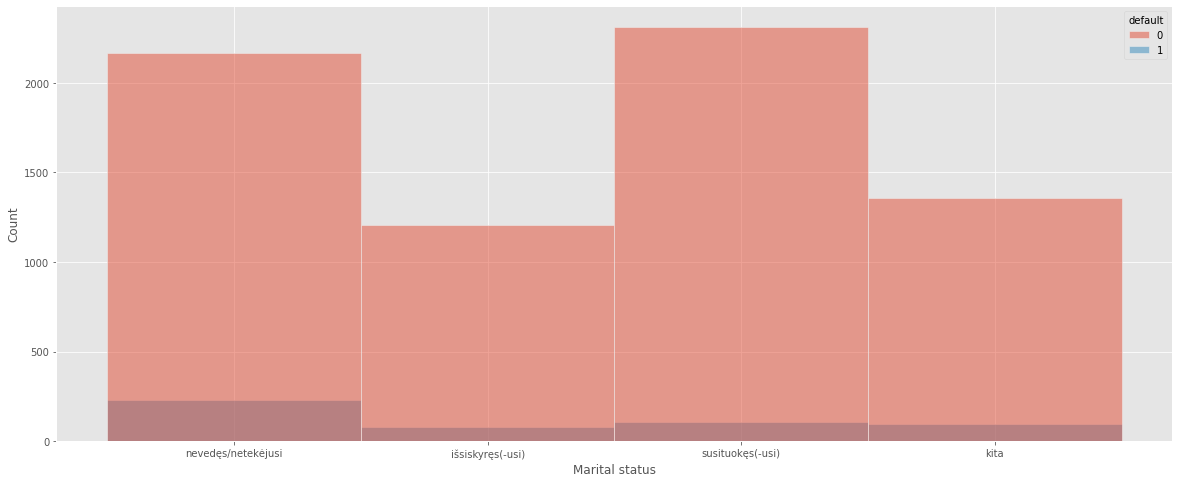

In [20]:
sns.histplot(x='Marital status', data=dataa, hue='default');

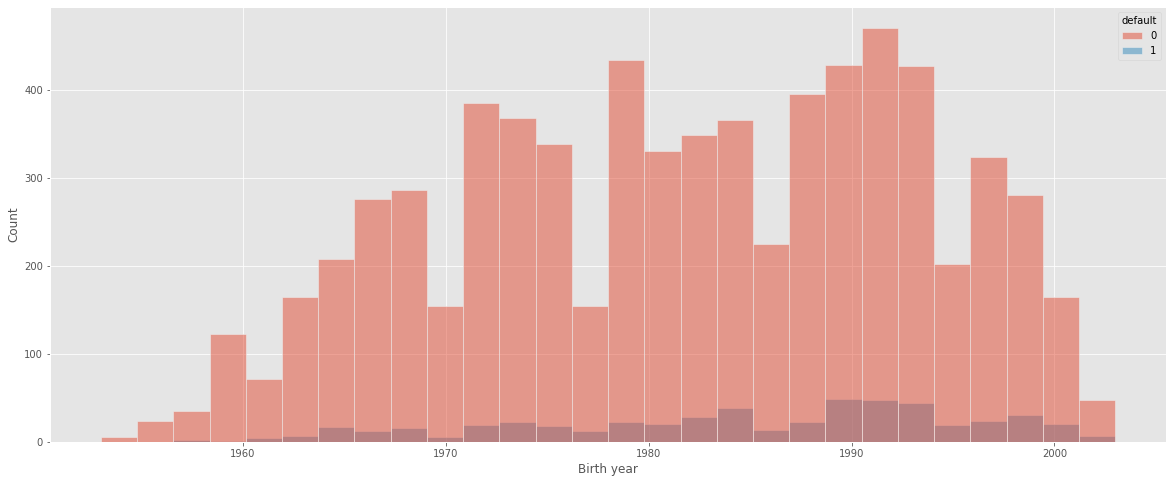

In [21]:
sns.histplot(x='Birth year', data=dataa, hue='default');

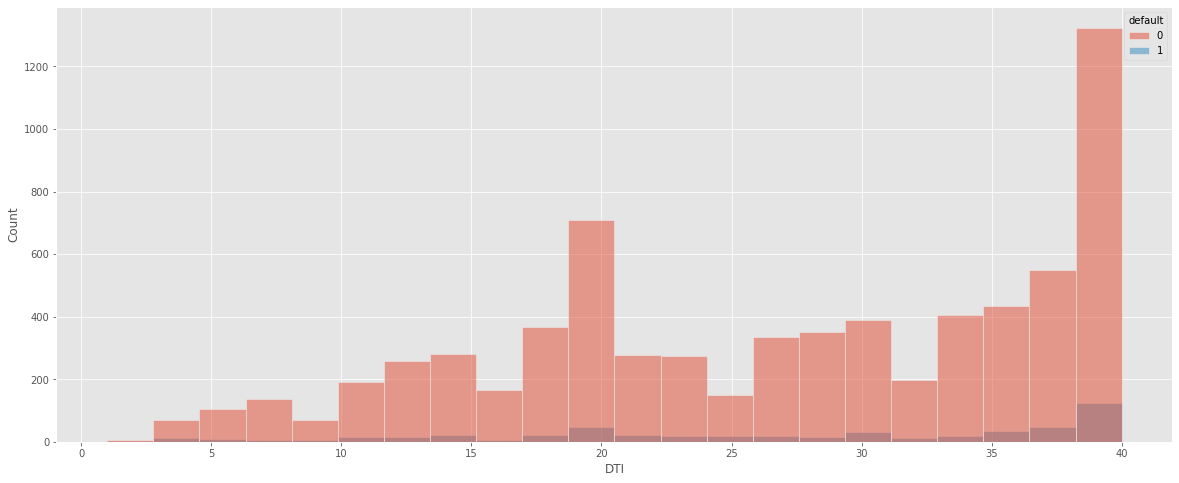

In [22]:
sns.histplot(x='DTI', data=dataa, hue = 'default');

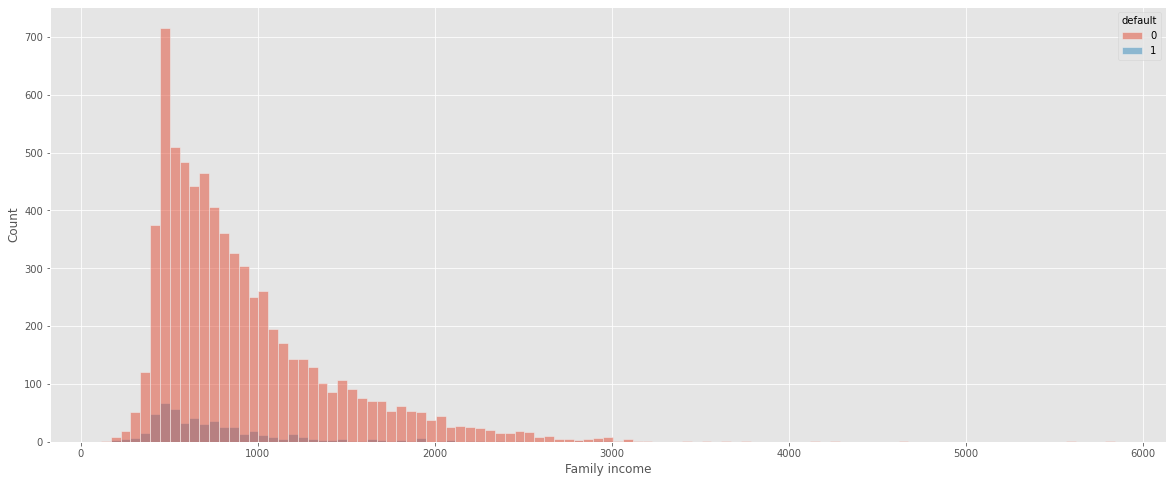

In [23]:
sns.histplot(x='Family income', data=dataa, hue = 'default');

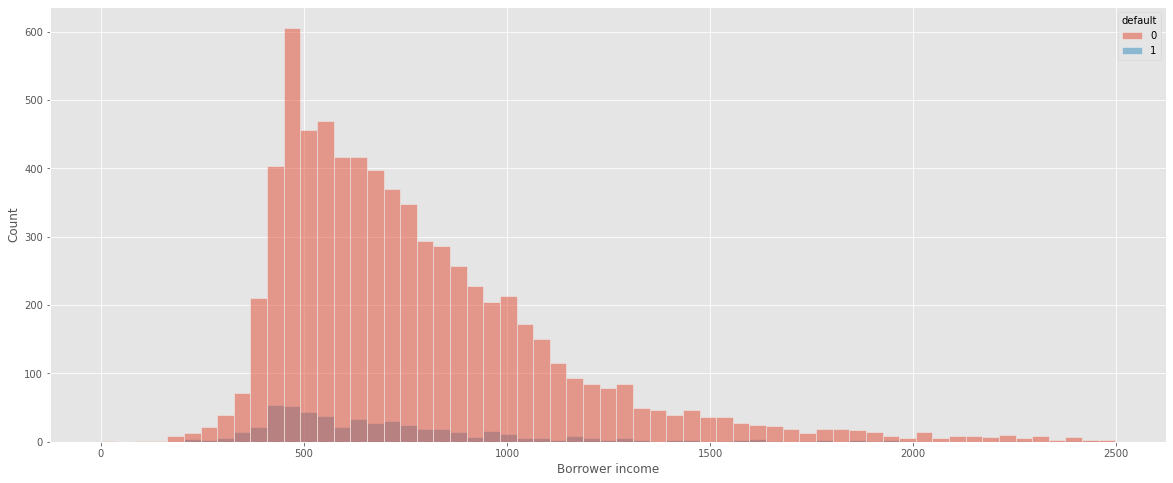

In [24]:
sns.histplot(x='Borrower income', data=dataa, hue = 'default');

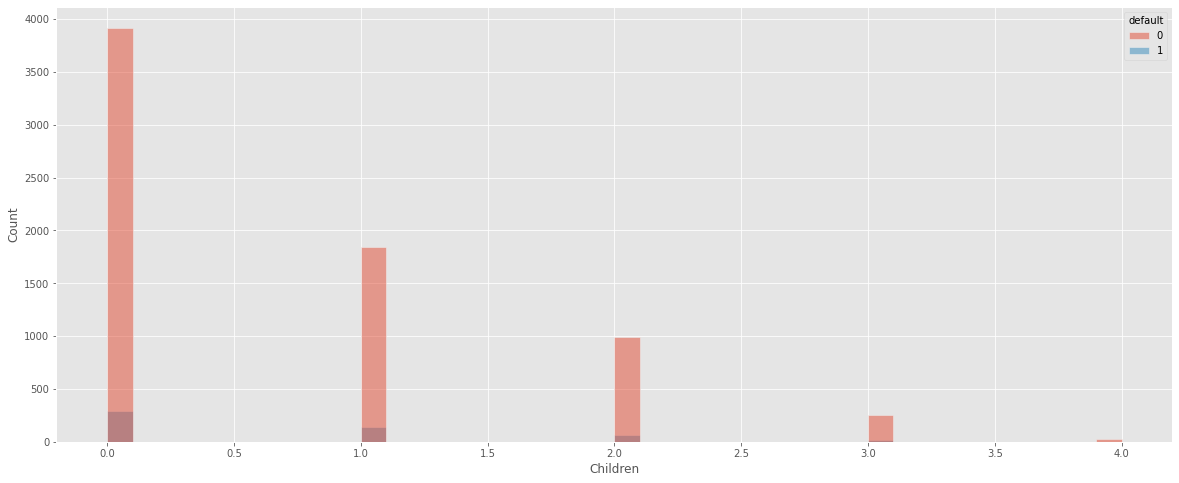

In [25]:
sns.histplot(x="Children", data=dataa, hue = 'default');

In [26]:
corr = dataa.corr()
corr.style.background_gradient(cmap='coolwarm')

,Loan amount,Interest rate,Loan term,default,Monthly payment,Birth year,Children,Months at current employer,DTI,Family income,Family liabilities,Borrower income,Borrower liabilities
Loan amount,1.000000,-0.053715,0.604211,0.010519,0.848082,-0.065440,0.013066,0.057878,0.341645,0.141421,-0.123542,0.186161,-0.159468
Interest rate,-0.053715,1.000000,0.099543,0.199144,-0.033208,0.388628,0.043639,-0.212674,0.101103,-0.162331,-0.062193,-0.119024,-0.047781
Loan term,0.604211,0.099543,1.000000,0.026324,0.258748,-0.034899,0.042769,0.012824,0.325704,-0.018524,0.028640,0.005689,0.023286
default,0.010519,0.199144,0.026324,1.000000,0.028235,0.070015,-0.007661,-0.076853,0.015532,-0.070809,-0.077886,-0.055358,-0.073607
Monthly payment,0.848082,-0.033208,0.258748,0.028235,1.000000,-0.034941,-0.006470,0.042976,0.294073,0.166698,-0.164016,0.216731,-0.201863
Birth year,-0.065440,0.388628,-0.034899,0.070015,-0.034941,1.000000,0.063171,-0.418041,-0.059855,-0.129743,-0.113183,-0.041701,-0.092581
Children,0.013066,0.043639,0.042769,-0.007661,-0.006470,0.063171,1.000000,-0.012792,-0.019670,0.121651,0.097628,0.042832,0.063951
Months at current employer,0.057878,-0.212674,0.012824,-0.076853,0.042976,-0.418041,-0.012792,1.000000,0.076093,0.195792,0.179640,0.147184,0.167045
DTI,0.341645,0.101103,0.325704,0.015532,0.294073,-0.059855,-0.019670,0.076093,1.000000,-0.010569,0.401893,-0.009519,0.403383
Family income,0.141421,-0.162331,-0.018524,-0.070809,0.166698,-0.129743,0.121651,0.195792,-0.010569,1.000000,0.719600,0.750455,0.599875


In [27]:
file_name = 'duomenys.xlsx'
  
# saving the excel
dataa.to_excel(file_name)